In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data\PIDD Data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   Diabetes function  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


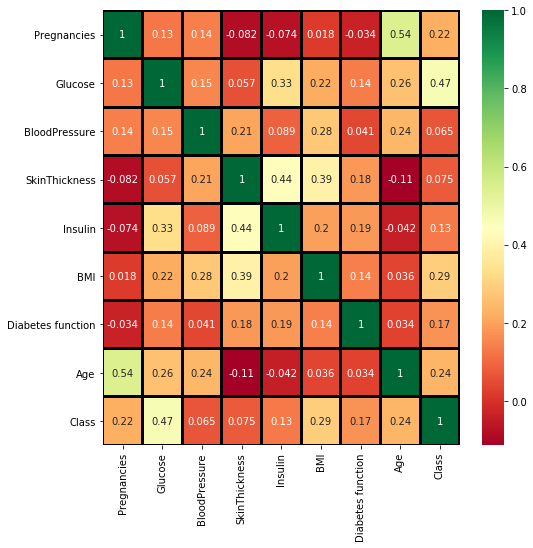

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",linewidths=2,linecolor='black')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [45]:
scaled=sc.fit_transform(df)
scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
df2=pca.transform(scaled)
df2

array([[-1.75694707, -1.11174258],
       [ 1.50742148,  0.55940565],
       [-0.65082201, -1.92957633],
       ...,
       [ 0.57408846, -0.03381634],
       [ 0.17269908, -1.32289215],
       [ 1.32126715,  1.02748861]])

In [48]:
X=pd.DataFrame(df2)
X.head()

,0,1
0,-1.756947,-1.111743
1,1.507421,0.559406
2,-0.650822,-1.929576
3,1.587398,1.065075
4,-2.483374,2.359563


In [49]:
y=pd.DataFrame(df['Class'])
y.head()

,Class
0,1
1,0
2,1
3,0
4,1


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [59]:
(X_train).shape

(614, 2)

In [61]:
import keras

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU,PReLU
from keras.layers import Dropout

In [63]:
classifier=Sequential()

In [64]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=2))

In [65]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [66]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [67]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size=10, nb_epoch=100)

C:\Users\Lenovo\.conda\envs\tensorflow 3.6\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 411 samples, validate on 203 samples
Epoch 1/100
411/411 [==============================] - 1s 3ms/step - loss: 0.8253 - accuracy: 0.2968 - val_loss: 0.7519 - val_accuracy: 0.3103
Epoch 2/100
411/411 [==============================] - 0s 459us/step - loss: 0.6784 - accuracy: 0.5328 - val_loss: 0.6299 - val_accuracy: 0.7537
Epoch 3/100
411/411 [==============================] - 0s 552us/step - loss: 0.5976 - accuracy: 0.7762 - val_loss: 0.5537 - val_accuracy: 0.8325
Epoch 4/100
411/411 [==============================] - 0s 432us/step - loss: 0.5420 - accuracy: 0.8005 - val_loss: 0.4994 - val_accuracy: 0.8571
Epoch 5/100
411/411 [==============================] - 0s 445us/step - loss: 0.5042 - accuracy: 0.7908 - val_loss: 0.4588 - val_accuracy: 0.8621
Epoch 6/100
411/411 [==============================] - 0s 412us/step - loss: 0.4759 - accuracy: 0.8102 - val_loss: 0.4247 - val_accuracy: 0.8670
Epoch 7/100
411/411 [==============================] - 0s 408us/step - loss: 0.4540 - 

Epoch 57/100
411/411 [==============================] - 0s 476us/step - loss: 0.3838 - accuracy: 0.8175 - val_loss: 0.3251 - val_accuracy: 0.8670
Epoch 58/100
411/411 [==============================] - 0s 545us/step - loss: 0.3827 - accuracy: 0.8175 - val_loss: 0.3280 - val_accuracy: 0.8768
Epoch 59/100
411/411 [==============================] - 0s 584us/step - loss: 0.3825 - accuracy: 0.8151 - val_loss: 0.3150 - val_accuracy: 0.8719
Epoch 60/100
411/411 [==============================] - 0s 474us/step - loss: 0.3819 - accuracy: 0.8224 - val_loss: 0.3186 - val_accuracy: 0.8719
Epoch 61/100
411/411 [==============================] - 0s 500us/step - loss: 0.3817 - accuracy: 0.8151 - val_loss: 0.3237 - val_accuracy: 0.8768
Epoch 62/100
411/411 [==============================] - 0s 489us/step - loss: 0.3805 - accuracy: 0.8224 - val_loss: 0.3179 - val_accuracy: 0.8670
Epoch 63/100
411/411 [==============================] - 0s 690us/step - loss: 0.3827 - accuracy: 0.8151 - val_loss: 0.3166 -

In [69]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


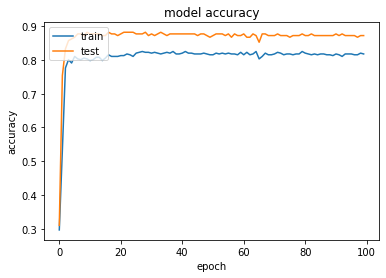

In [70]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

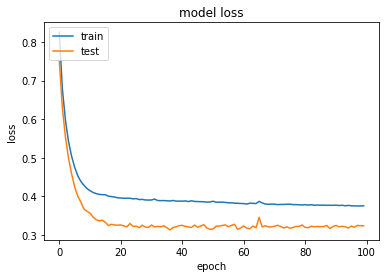

In [71]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
prediction=classifier.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction.round()))
print(confusion_matrix(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        96
           1       0.85      0.79      0.82        58

    accuracy                           0.87       154
   macro avg       0.87      0.85      0.86       154
weighted avg       0.87      0.87      0.87       154

[[88  8]
 [12 46]]


In [74]:
from sklearn.metrics import accuracy_score
score=accuracy_score(prediction.round(),y_test)
score

0.8701298701298701